# A simple ripple carry adder on the QPU

In this notebook we implement a "simple" reversible binary adder. It is based on

*A new quantum ripple-carry addition circuit*, by 
Cuccaro, Draper, Kutin, and Moulton. See
https://arxiv.org/abs/quant-ph/0410184v1 .

The whole circuit is classical in the sense that we start and end in computational basis states and all gates simply perform classical not, controlled not, or doublely controled not.

In [1]:
import numpy as np
from pyquil.quil import Program

from pyquil.gates import *
from pyquil.api import get_qc
from forest_benchmarking.classical_logic.ripple_carry_adder import *

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# noiseless QVM
qc = get_qc("Aspen-1-15Q-A", as_qvm=True, noisy=False)

# noisy QVM
noisy_qc = get_qc("9q-generic-noisy-qvm", as_qvm=True, noisy=True)

## Draw the noiseless qc topology

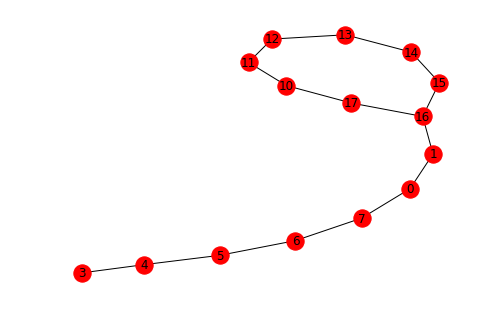

In [3]:
nx.draw(qc.qubit_topology(),with_labels=True)

## Start with 1+1=2 on a noiseless simulation

In [4]:
num_a = [0,1]
num_b = [0,1]
reg_a, reg_b, c, z = assign_registers_to_line_or_cycle(3, qc.qubit_topology(), len(num_a))
ckt = adder(num_a, num_b, reg_a, reg_b, c, z)
print(ckt)
exe = qc.compiler.native_quil_to_executable(ckt)
qc.run(exe)

RX(pi/2) 5
RX(pi/2) 5
RX(pi/2) 4
RX(pi/2) 4
RX(pi/2) 4
RZ(-pi/2) 4
RX(-pi/2) 4
RZ(pi) 4
CZ 5 4
RX(pi/2) 4
RZ(-pi/2) 4
RX(-pi/2) 4
RZ(pi) 4
RX(pi/2) 3
RZ(-pi/2) 3
RX(-pi/2) 3
RZ(pi) 3
CZ 5 3
RX(pi/2) 3
RZ(-pi/2) 3
RX(-pi/2) 3
RZ(pi) 3
RX(pi/2) 5
RZ(-pi/2) 5
RX(-pi/2) 5
RZ(pi) 5
RX(pi/2) 5
RZ(-pi/2) 5
RX(-pi/2) 5
RZ(pi) 5
CZ 4 5
RX(pi/2) 5
RZ(-pi/2) 5
RX(-pi/2) 5
RZ(pi) 5
RZ(-pi/4) 5
RX(pi/2) 5
RZ(-pi/2) 5
RX(-pi/2) 5
RZ(pi) 5
CZ 3 5
RX(pi/2) 5
RZ(-pi/2) 5
RX(-pi/2) 5
RZ(pi) 5
RZ(pi/4) 5
RX(pi/2) 5
RZ(-pi/2) 5
RX(-pi/2) 5
RZ(pi) 5
CZ 4 5
RX(pi/2) 5
RZ(-pi/2) 5
RX(-pi/2) 5
RZ(pi) 5
RZ(-pi/4) 5
RX(pi/2) 5
RZ(-pi/2) 5
RX(-pi/2) 5
RZ(pi) 5
CZ 3 5
RX(pi/2) 5
RZ(-pi/2) 5
RX(-pi/2) 5
RZ(pi) 5
RZ(pi/4) 4
RZ(pi/4) 5
RX(pi/2) 4
RZ(-pi/2) 4
RX(-pi/2) 4
RZ(pi) 4
CZ 3 4
RX(pi/2) 4
RZ(-pi/2) 4
RX(-pi/2) 4
RZ(pi) 4
RX(pi/2) 5
RZ(-pi/2) 5
RX(-pi/2) 5
RZ(pi) 5
RZ(pi/4) 3
RZ(-pi/4) 4
RX(pi/2) 4
RZ(-pi/2) 4
RX(-pi/2) 4
RZ(pi) 4
CZ 3 4
RX(pi/2) 4
RZ(-pi/2) 4
RX(-pi/2) 4
RZ(pi) 4
RX(pi/2) 6
RZ(-pi/2) 6
RX(-p

array([[0, 1, 0]])

## Draw the noisy qc topology

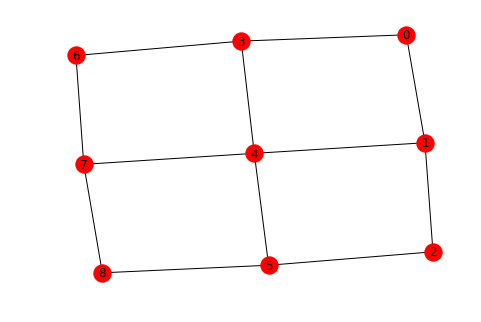

In [5]:
nx.draw(noisy_qc.qubit_topology(),with_labels=True)

## Now try 1+1=2 on a noisy qc

In [14]:
reg_a, reg_b, c, z = get_qubit_registers_for_adder(noisy_qc, len(num_a))
ckt = adder(num_a, num_b, reg_a, reg_b, c, z)
print(ckt)
exe = noisy_qc.compiler.native_quil_to_executable(ckt)
noisy_qc.run(exe)

RX(pi/2) 0
RX(pi/2) 0
RX(pi/2) 1
RX(pi/2) 1
RX(pi/2) 1
RZ(-pi/2) 1
RX(-pi/2) 1
RZ(pi) 1
CZ 0 1
RX(pi/2) 1
RZ(-pi/2) 1
RX(-pi/2) 1
RZ(pi) 1
RX(pi/2) 2
RZ(-pi/2) 2
RX(-pi/2) 2
RZ(pi) 2
CZ 0 2
RX(pi/2) 2
RZ(-pi/2) 2
RX(-pi/2) 2
RZ(pi) 2
RX(pi/2) 0
RZ(-pi/2) 0
RX(-pi/2) 0
RZ(pi) 0
RX(pi/2) 0
RZ(-pi/2) 0
RX(-pi/2) 0
RZ(pi) 0
CZ 1 0
RX(pi/2) 0
RZ(-pi/2) 0
RX(-pi/2) 0
RZ(pi) 0
RZ(-pi/4) 0
RX(pi/2) 0
RZ(-pi/2) 0
RX(-pi/2) 0
RZ(pi) 0
CZ 2 0
RX(pi/2) 0
RZ(-pi/2) 0
RX(-pi/2) 0
RZ(pi) 0
RZ(pi/4) 0
RX(pi/2) 0
RZ(-pi/2) 0
RX(-pi/2) 0
RZ(pi) 0
CZ 1 0
RX(pi/2) 0
RZ(-pi/2) 0
RX(-pi/2) 0
RZ(pi) 0
RZ(-pi/4) 0
RX(pi/2) 0
RZ(-pi/2) 0
RX(-pi/2) 0
RZ(pi) 0
CZ 2 0
RX(pi/2) 0
RZ(-pi/2) 0
RX(-pi/2) 0
RZ(pi) 0
RZ(pi/4) 1
RZ(pi/4) 0
RX(pi/2) 1
RZ(-pi/2) 1
RX(-pi/2) 1
RZ(pi) 1
CZ 2 1
RX(pi/2) 1
RZ(-pi/2) 1
RX(-pi/2) 1
RZ(pi) 1
RX(pi/2) 0
RZ(-pi/2) 0
RX(-pi/2) 0
RZ(pi) 0
RZ(pi/4) 2
RZ(-pi/4) 1
RX(pi/2) 1
RZ(-pi/2) 1
RX(-pi/2) 1
RZ(pi) 1
CZ 2 1
RX(pi/2) 1
RZ(-pi/2) 1
RX(-pi/2) 1
RZ(pi) 1
RX(pi/2) 3
RZ(-pi/2) 3
RX(-p

array([[0, 1, 0]])

## Get results for all summations of pairs of n-bit strings

In [7]:
n_bits = 2
results = get_n_bit_adder_results(noisy_qc, n_bits, use_param_program=False)

In [8]:
# sucess probabilities of different input strings
get_success_probabilities_from_results(results)

[0.7999999999999999,
 0.7999999999999999,
 0.8999999999999999,
 0.7,
 0.8999999999999999,
 0.7999999999999999,
 0.8999999999999999,
 0.8999999999999999,
 0.7999999999999999,
 0.7,
 0.7999999999999999,
 0.7,
 0.30000000000000004,
 0.30000000000000004,
 0.6,
 0.6]

## Get the distribution of the hamming weight of errors

In [9]:
distributions = get_error_hamming_distributions_from_results(results)

## Plot average distribution over all summations; compare to random

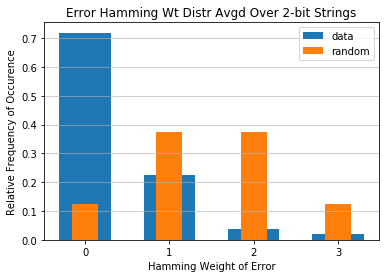

In [10]:
from scipy.special import comb

averaged_distr = np.mean(distributions, axis=0)

rand_ans_distr = [comb(n_bits + 1, x)/2**(n_bits + 1) for x in range(len(averaged_distr))]

x_labels = np.arange(0, len(averaged_distr))
plt.bar(x_labels, averaged_distr, width=0.61, align='center')
plt.bar(x_labels, rand_ans_distr, width=0.31, align='center')
plt.xticks(x_labels)
plt.xlabel('Hamming Weight of Error')
plt.ylabel('Relative Frequency of Occurence')
plt.grid(axis='y', alpha=0.75)
plt.legend(['data','random'])
plt.title('Error Hamming Wt Distr Avgd Over {}-bit Strings'.format(n_bits))
plt.show()

## Now do the same, but with addition in the X basis

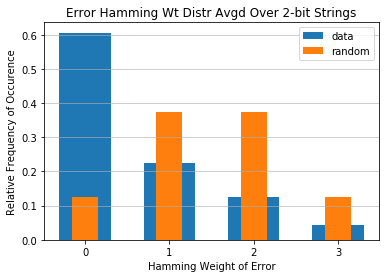

In [11]:
n_bits = 2
# set in_x_basis to true here
results = get_n_bit_adder_results(noisy_qc, n_bits, in_x_basis=True)
distributions = get_error_hamming_distributions_from_results(results)

averaged_distr = np.mean(distributions, axis=0)
x_labels = np.arange(0, len(averaged_distr))
plt.bar(x_labels, averaged_distr, width=0.61, align='center')
plt.bar(x_labels, rand_ans_distr, width=0.31, align='center')
plt.xticks(x_labels)
plt.xlabel('Hamming Weight of Error')
plt.ylabel('Relative Frequency of Occurence')
plt.grid(axis='y', alpha=0.75)
plt.legend(['data','random'])
plt.title('Error Hamming Wt Distr Avgd Over {}-bit Strings'.format(n_bits))
plt.show()

# Error probablity to random guess probablity as a function of number of added bits

Here we compare the average probablity of the adder working as a function of input size (averaged over all possible input strings) to random guessing. To provide context we also compare this to the error probablity of the best input string (likely the all zero input string) and the worst input string (likely all ones).

In [12]:
summand_lengths = [1,2,3]
avg_n = []
min_n = []
max_n = []
rand_n = []

for n_bits in summand_lengths:
    results = get_n_bit_adder_results(noisy_qc, n_bits)
    output_len = n_bits + 1
    # success probablity average over all input strings
    avg_n.append(np.average(get_success_probabilities_from_results(results)))
    # success probablity input bit string with most errors
    min_n.append(np.min(get_success_probabilities_from_results(results)))
    # success probablity input bit string with least errors
    max_n.append(np.max(get_success_probabilities_from_results(results)))
    # sucess probablity of randomly guessing the correct answer
    rand_n.append(1 / 2**output_len) #.append(rand_ans_distr[0])

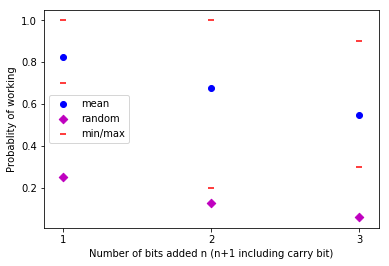

In [13]:
plt.scatter(summand_lengths, avg_n, c='b', label='mean')
plt.scatter(summand_lengths, rand_n, c='m', marker='D', label='random')
plt.scatter(summand_lengths, min_n, c='r', marker='_', label='min/max')
plt.scatter(summand_lengths, max_n, c='r', marker='_')
plt.xticks(summand_lengths) #, [str(n_bits) for n_bits in summand_lengths])
plt.xlabel('Number of bits added n (n+1 including carry bit)')
plt.ylabel('Probablity of working')
plt.legend()
plt.show()